<a href="https://colab.research.google.com/github/ayoub-ait-idir/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [235]:
# import and split data :
data = pd.read_csv('/content/AmesHousing.txt', delimiter='\t')

train_data = data[0: 1460]
test_data = data[1460: ]

In [236]:
# display the data
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [237]:
# Understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [238]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [239]:
# target value
target = 'SalePrice'

Regression Linéaire Simple

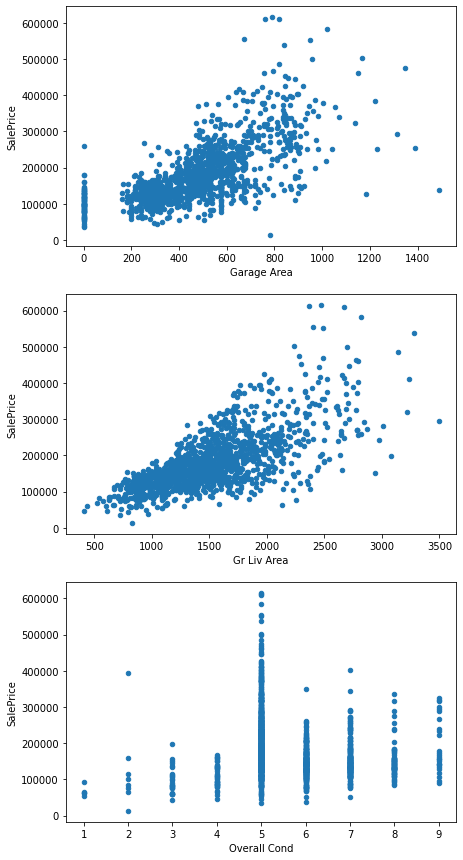

In [240]:
figure = plt.figure(figsize=(7, 15))

# ax2 = figure.add_subplot(3, 1, 2) ==> 3 lignes / 1 collonne / 2iem élément
ax1 = figure.add_subplot(3, 1, 1)
ax2 = figure.add_subplot(3, 1, 2)
ax3 = figure.add_subplot(3, 1, 3)

train_data.plot(x='Garage Area' , y=target, ax=ax1 , kind='scatter')
train_data.plot(x='Gr Liv Area' , y=target, ax=ax2 , kind='scatter')
train_data.plot(x='Overall Cond', y=target, ax=ax3 , kind='scatter')

plt.show()

In [241]:
# from this three plots we see that Gr Liv Area is the most correlated to our target
# to make sure we can calculate the correlations between theese cols and the target

train_data[['Garage Area', 'Gr Liv Area', 'Overall Cond', target]].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


In [242]:
test_data['Overall Cond'].isnull().sum()

0

RSS : residual sum of squares

In [243]:
# use Scikit learn for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train_data[['Gr Liv Area']]
y_train = train_data[target]

model = LinearRegression()
model.fit(X_train, y_train)

# we can get the params values using coef_ (ai) and intercept (a0)
a1 = model.coef_
a0 = model.intercept_
print('a0 = ', a0 ,'  a1 = ', a1)

a0 =  5366.821710056043   a1 =  [116.86624683]


In [244]:
# make predictions
X_train = train_data[['Gr Liv Area']]
y_train = train_data[target]

model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(train_data[['Gr Liv Area']])
test_predictions = model.predict(test_data[['Gr Liv Area']])

train_mse = mean_squared_error(train_data[target], train_predictions)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(test_data[target], test_predictions)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


Multiple linear regression

In [245]:
# make predictions using multiple columns
cols = ['Overall Cond' ,'Gr Liv Area']
target = 'SalePrice'

X_train = train_data[cols]
y_train = train_data[target]

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(train_data[cols])
test_predictions = model.predict(test_data[cols])

train_mse = mean_squared_error(train_data[target], train_predictions)
train_rmse2 = np.sqrt(train_mse)
test_mse = mean_squared_error(test_data[target], test_predictions)
test_rmse2 = np.sqrt(test_mse)

print(train_rmse2)
print(test_rmse2)

56032.39801525867
57066.90779448559


Missing Values :

In [246]:
numerical_data = data.select_dtypes(include=['int', 'float'])

cols_deleted = ['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']
numerical_data = numerical_data.drop(cols_deleted, axis=1)
numerical_data.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900


In [247]:
null_series = numerical_data.isnull().sum()
full_cols_series = null_series[null_series == 0]
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [248]:
subset_data = numerical_data[full_cols_series.index]
variable_sorted_cols = (np.abs(subset_data.corr()[target])).sort_values(ascending = False)
variable_sorted_cols

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
1st Flr SF         0.621676
Full Bath          0.545604
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
2nd Flr SF         0.269373
Lot Area           0.266549
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
MS SubClass        0.085092
Pool Area          0.068403
Low Qual Fin SF    0.037660
3Ssn Porch         0.032225
Order              0.031408
Misc Val           0.015691
Name: SalePrice, dtype: float64

Heatmap

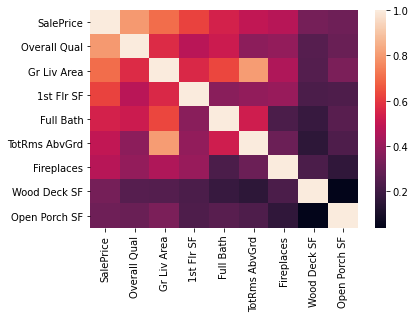

In [249]:
cols_choosed = variable_sorted_cols[variable_sorted_cols > 0.3]
strong_corrs = subset_data[cols_choosed.index].corr()

sns.heatmap(strong_corrs)

In [250]:
strong_corrs.columns

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF'],
      dtype='object')

In [251]:
# D'après la heatmap, on considère que les colonnes TotRms AbvGrd
# er Gr Liv Area sont fortement corrélé dont la nécessité de les supprimer

final_cols = strong_corrs.drop(['TotRms AbvGrd', 'Gr Liv Area'])
test_data[final_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1470 non-null   int64
 1   Overall Qual   1470 non-null   int64
 2   1st Flr SF     1470 non-null   int64
 3   Full Bath      1470 non-null   int64
 4   Fireplaces     1470 non-null   int64
 5   Wood Deck SF   1470 non-null   int64
 6   Open Porch SF  1470 non-null   int64
dtypes: int64(7)
memory usage: 80.5 KB


In [252]:
features = final_cols.drop(['SalePrice']).index
target = 'SalePrice'

clean_test = test_data[features]
model = LinearRegression()

model.fit(train_data[features], train_data[target])
preds_train = model.predict(train_data[features])
train_mse = mean_squared_error(train_data[target], preds_train)
train_rmse = np.sqrt(train_mse)

model.fit(clean_test, test_data[target])
preds_test = model.predict(clean_test)
test_mse = mean_squared_error(test_data[target], preds_test)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

37773.95822943731
42442.95953654081


Delete columns with low variance ( low variance = same column )

In [253]:
# this step refers also to normalizing
train_data2 = train_data[features]
train_ = ((train_data2 - train_data2.min()) / (train_data2.max() - train_data2.min()))

sorted_vars = train_.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


In [254]:
features

Index(['Overall Qual', '1st Flr SF', 'Full Bath', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF'],
      dtype='object')

Final Model

In [256]:
clean_test = test_data[final_cols.index].dropna()
features = features.drop('Open Porch SF')

model = LinearRegression()
model.fit(train_data[features], train_data['SalePrice'])
train_predictions = model.predict(train_data[features])
test_predictions  = model.predict(test_data[features])

train_mse = mean_squared_error(train_predictions, train_data[target])
test_mse  = mean_squared_error(test_predictions, test_data[target])

train_rmse3 = np.sqrt(train_mse)
test_rmse3 = np.sqrt(test_mse)

print(train_rmse3)
print(test_rmse3)

38793.3161416261
44111.95043660773
